## EDA notebook

#### Contents: 
1. Exploration of profile dataset, which includes demographic data of rewards programme users
2. Exploration of transcript dataset, which includes the transaction records for rewards programme users
3. Exploration of portfolio dataset, which includes duration, difficulty and rewards of rewards programme user

In [1]:
# import packagaes 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# read in the json files
portfolio = pd.read_json('../data/raw/portfolio.json', orient='records', lines=True)
profile = pd.read_json('../data/raw/profile.json', orient='records', lines=True)
transcript = pd.read_json('../data/raw/transcript.json', orient='records', lines=True)

#### 1. Profile dataset

In [2]:
# Get overview of contents of profile dataset
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [3]:
# Missing data in profile
print('Number of users with missing gender and income data: {}'.format(17000-14825))

Number of users with missing gender and income data: 2175


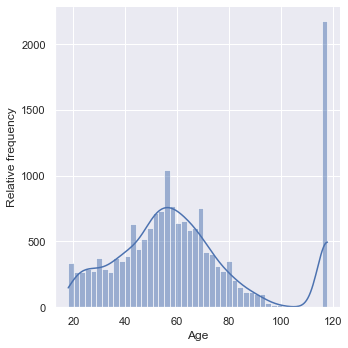

In [4]:
# Distribution of user ages 
sns.displot(profile['age'], kde=True);
plt.xlabel('Age');
plt.ylabel('Relative frequency');
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.savefig('EDA_Age.png', dpi=500)

- There are > 2000 users who have an age entered as 118 years.

- This may be the same people with missing gender and income data. Is this true



In [5]:
profile[profile['gender'].isna()==True]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


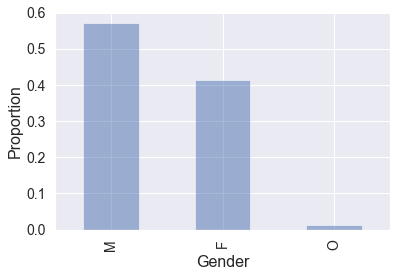

In [6]:
# Proportion of male, female and other users 
profile['gender'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5);
plt.xlabel('Gender');
plt.ylabel('Proportion');
plt.savefig('EDA_gender.png', dpi=500)

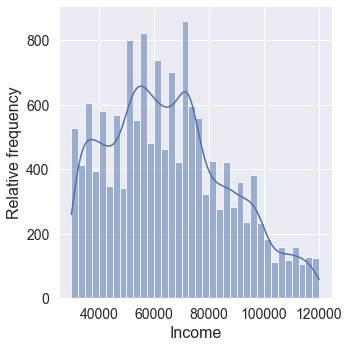

In [7]:
# Distribution of user income 
sns.displot(profile['income'], kde=True);
plt.xlabel('Income');
plt.ylabel('Relative frequency');
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.savefig('EDA_income.png', dpi=500)

- Since it seems that the same users that have ages > 100 are the ones missing gender and income data, remove these users and check if the demographic data for all the remaining users are filled.

In [8]:
# Remove users with ages > 100
profile_mod = profile[profile['age']<= 100]
profile_mod.isna().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

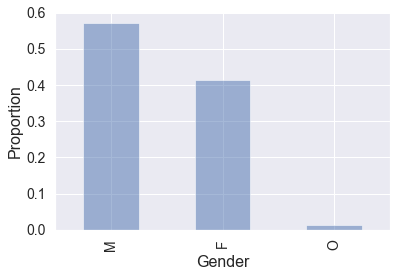

In [9]:
# Visualise gender distribution of users after removing outliers. 
profile_mod['gender'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5);
plt.xlabel('Gender');
plt.ylabel('Proportion');
plt.savefig('EDA_profilemod_gender.png', dpi=500)

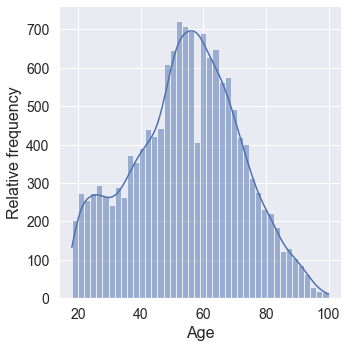

In [10]:
# Visualise age distribution of users after removing outliers. 
sns.displot(profile_mod['age'], kde=True);
plt.xlabel('Age');
plt.ylabel('Relative frequency');
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.savefig('EDA_profilemod_age.png', dpi=500)

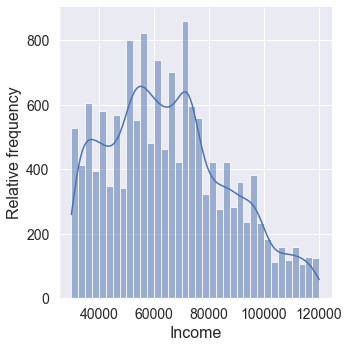

In [11]:
# Visualise income distribution of users after removing outliers. 
sns.displot(profile_mod['income'], kde=True);
plt.xlabel('Income');
plt.ylabel('Relative frequency');
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.savefig('EDA_profilemod_income.png', dpi=500)

In [12]:
# Compute statistics of income data
print('Minimum income of users : {:.2f}'.format(profile_mod['income'].min()))
print('Maximum income of users : {:.2f}'.format(profile_mod['income'].max()))
print('Median income of users : {:.2f}'.format(profile_mod['income'].median()))
print('Average income of users : {:.2f}'.format(profile_mod['income'].mean()))

Minimum income of users : 30000.00
Maximum income of users : 120000.00
Median income of users : 64000.00
Average income of users : 65404.18


In [13]:
print('Median age of users : {:.2f}'.format(profile_mod['age'].median()))
print('Average income of users : {:.2f}'.format(profile_mod['age'].mean()))

Median age of users : 55.00
Average income of users : 54.38


#### 2. Transcript dataset 

In [14]:
# Get overview of contents of transcript dataset 
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [15]:
# Get the proportion of event types in the transcript dataset
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

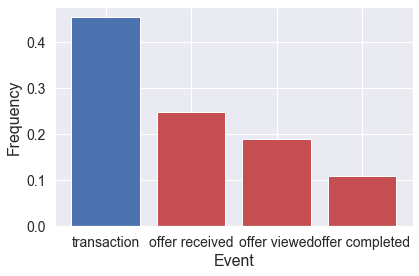

In [16]:
# Visualise the proportion of event types in the transcript dataset

plt.bar(height=transcript['event'].value_counts(normalize=True), x=transcript['event'].value_counts().index, color=['b','r','r','r'])
plt.xlabel('Event');
plt.ylabel('Frequency');
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.figsize'] = [8, 6]
plt.tight_layout()
plt.savefig('EDA_trans_events.png', dpi=500)

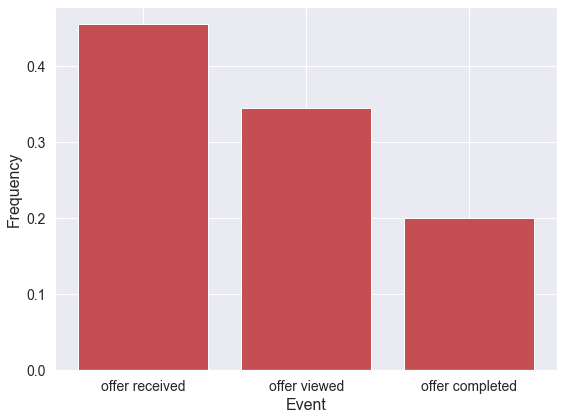

In [17]:
# Visualise the proportion of offer event types in the transcript dataset

offers = transcript[transcript['event'] != 'transaction']
plt.bar(height=offers['event'].value_counts(normalize=True), x=offers['event'].value_counts().index, color='r')
plt.xlabel('Event');
plt.ylabel('Frequency');
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.figsize'] = [6, 4]
plt.tight_layout()
plt.savefig('EDA_trans_offers.png', dpi=500)

<AxesSubplot:>

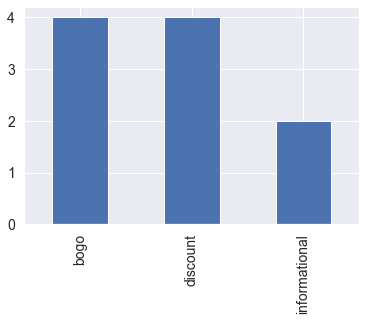

In [18]:
# Visualise the number of offer types in the transcript dataset

portfolio['offer_type'].value_counts().plot(kind='bar')

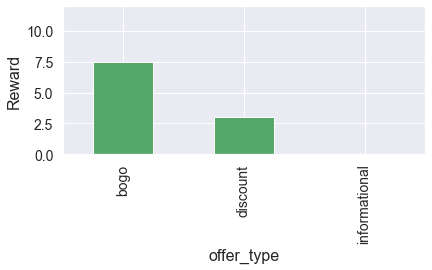

In [19]:
# Visualise the average reward for each offer type in the transcript dataset
portfolio.groupby('offer_type')['reward'].mean().plot(kind='bar', color='g')
plt.ylabel('Reward')
plt.ylim(0,12)
plt.rcParams['axes.labelsize'] = 16
plt.tight_layout()

plt.savefig('EDA_port_rewards.png', dpi=500)

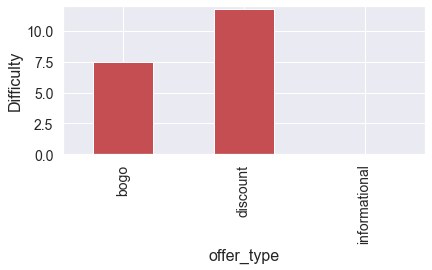

In [20]:
# Visualise the average difficulty (i.e. the amt of money to be spent) for each offer type in the transcript dataset
portfolio.groupby('offer_type')['difficulty'].mean().plot(kind='bar', color='r')
plt.ylabel('Difficulty')
plt.ylim(0,12)
plt.tight_layout()

plt.savefig('EDA_port_difficulty.png', dpi=500)

#### 3. Portfolio dataset

In [21]:
# Get overview of contents of portfolio
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [22]:
# Compute desc stats of reward, difficulty and duration of BOGO offers received by users
portfolio[portfolio['offer_type']=='bogo'].describe()

,reward,difficulty,duration
count,4.000000,4.000000,4.000000
mean,7.500000,7.500000,6.000000
std,2.886751,2.886751,1.154701
min,5.000000,5.000000,5.000000
25%,5.000000,5.000000,5.000000
50%,7.500000,7.500000,6.000000
75%,10.000000,10.000000,7.000000
max,10.000000,10.000000,7.000000


In [23]:
# Compute desc stats of reward, difficulty and duration of discount offers received by users
portfolio[portfolio['offer_type']=='discount'].describe()

,reward,difficulty,duration
count,4.000000,4.000000,4.000000
mean,3.000000,11.750000,8.500000
std,1.414214,5.678908,1.732051
min,2.000000,7.000000,7.000000
25%,2.000000,9.250000,7.000000
50%,2.500000,10.000000,8.500000
75%,3.500000,12.500000,10.000000
max,5.000000,20.000000,10.000000
